In [1]:
#EMPLOYEE SALARY PREDICTION USING ADULT.CSV
# Importing libraries...
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/home/chinnamgarispurthi/Downloads/adult.csv")

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.shape   # For no.of rows and columns

(48842, 15)

In [5]:
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [6]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(52)

In [10]:
data = data.drop_duplicates()

In [11]:
data['age'].value_counts()

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [12]:
data.workclass.value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [13]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
data.education.value_counts() #Here, we can remove Preschool column, because they don't earn any money

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [15]:
data['educational-num'].value_counts()

educational-num
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: count, dtype: int64

In [16]:
data['marital-status'].value_counts() # Here, we can remove married-AF-spouse

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

In [17]:
data.occupation.value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [18]:
data.gender.value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [19]:
data['capital-gain'].value_counts()

capital-gain
0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

In [20]:
data['capital-loss'].value_counts()

capital-loss
0       46508
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2080        1
155         1
2201        1
Name: count, Length: 99, dtype: int64

In [21]:
data['hours-per-week'].value_counts()

hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64

In [22]:
data['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [23]:
data.loc[:, 'occupation'] = data['occupation'].replace({'?':'others'})

In [24]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
others               2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64


In [25]:
data.loc[:,'workclass'] = data['workclass'].replace({'?':'NA'})

In [26]:
print(data.workclass.value_counts())

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
NA                   2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [27]:
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-work']

In [28]:
print(data.workclass.value_counts())

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
NA                   2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Never-worked           10
Name: count, dtype: int64


In [29]:
data = data[data['education']!='Preschool']
data = data[data['education']!='1st-4th']

In [30]:
print(data['education'].value_counts())

education
HS-grad         15756
Some-college    10860
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1599
10th             1389
7th-8th           952
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
Name: count, dtype: int64


In [31]:
data.shape

(48443, 15)

In [32]:
# Redundancy
#     From education and educational-num, we can remove education because at some point we convert every column into integers. here,
# education is in catergorical column and educational-num is in integers. so,remove education column

data.drop(columns=['educational-num'], inplace=True)

In [33]:
data.drop(columns=['relationship'],inplace=True)

In [34]:
data.drop(columns=['race'], inplace=True)

In [35]:
data.drop(columns=['fnlwgt'], inplace=True)

In [36]:
data.drop(columns=['gender'], inplace=True)

In [37]:
data

,age,workclass,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,7688,0,40,United-States,>50K
4,18,NA,Some-college,Never-married,others,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,0,0,40,United-States,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,0,0,20,United-States,<=50K


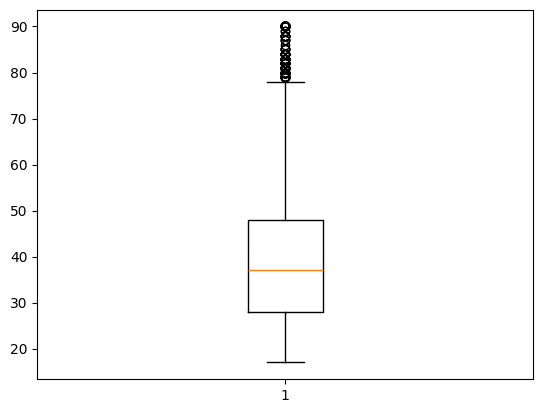

In [38]:
#outliers
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [39]:
data=data[(data['age']<80) & (data['age']>18)]  # Here outliners are retired employees i.e., b/w age 80 to 90

In [40]:
data.age.value_counts()

age
36    1341
35    1332
33    1325
23    1320
31    1310
      ... 
75      70
76      69
77      53
78      33
79      30
Name: count, Length: 61, dtype: int64

In [41]:
data.shape

(46810, 10)

In [42]:
#plt.boxplot(data['educational-num'])
#plt.show()

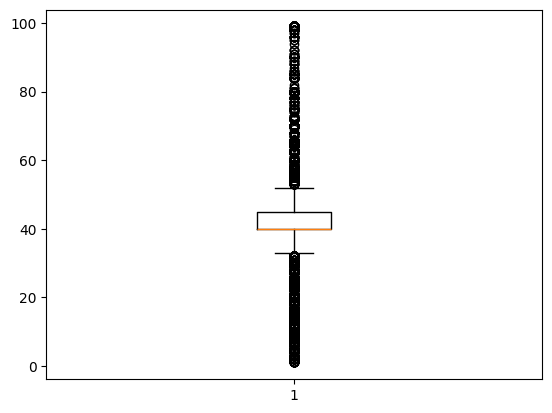

In [43]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [44]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.loc[:, 'workclass'] = encoder.fit_transform(data['workclass'])
data.loc[:, 'marital-status'] = encoder.fit_transform(data['marital-status'])
data.loc[:, 'occupation'] = encoder.fit_transform(data['occupation'])
data.loc[:, 'education'] = encoder.fit_transform(data['education'])
data.loc[:, 'native-country'] = encoder.fit_transform(data['native-country'])

In [45]:
data

,age,workclass,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,1,4,6,0,0,40,39,<=50K
1,38,4,10,2,4,0,0,50,39,<=50K
2,28,1,6,2,10,0,0,40,39,>50K
3,44,4,13,2,6,7688,0,40,39,>50K
5,34,4,0,4,7,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,4,6,2,12,0,0,38,39,<=50K
48838,40,4,10,2,6,0,0,40,39,>50K
48839,58,4,10,6,0,0,0,40,39,<=50K
48840,22,4,10,4,0,0,0,20,39,<=50K


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
import joblib

df = data.copy()

# Separating features and target, Here target is income
X = df.drop("income", axis=1)
y = df["income"]

# Automatically detecting categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Spliting of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining various ML models :
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    #"KNN": KNeighborsClassifier(),
    #"SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}
best_model_pipeline = None

# Training and evaluation
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name}: Accuracy = {acc:.4f}")
    print(classification_report(y_test, preds))
    
    # Stores the best model
    if best_model_pipeline is None or acc > results.get(best_model_name, 0):
        best_model_name = name
        best_model_pipeline = pipe

# Saving the best model pipeline (with preprocessing)...
joblib.dump(best_model_pipeline, "best_model_pipeline.pkl")
print(f"\n Best model saved: {best_model_name} with accuracy {results[best_model_name]:.4f}")



LogisticRegression: Accuracy = 0.8451
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7053
        >50K       0.73      0.59      0.65      2309

    accuracy                           0.85      9362
   macro avg       0.80      0.76      0.78      9362
weighted avg       0.84      0.85      0.84      9362


RandomForest: Accuracy = 0.8343
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7053
        >50K       0.68      0.61      0.65      2309

    accuracy                           0.83      9362
   macro avg       0.78      0.76      0.77      9362
weighted avg       0.83      0.83      0.83      9362


GradientBoosting: Accuracy = 0.8611
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7053
        >50K       0.80      0.58      0.67      2309

    accuracy                           0.86      9362
   macro avg       

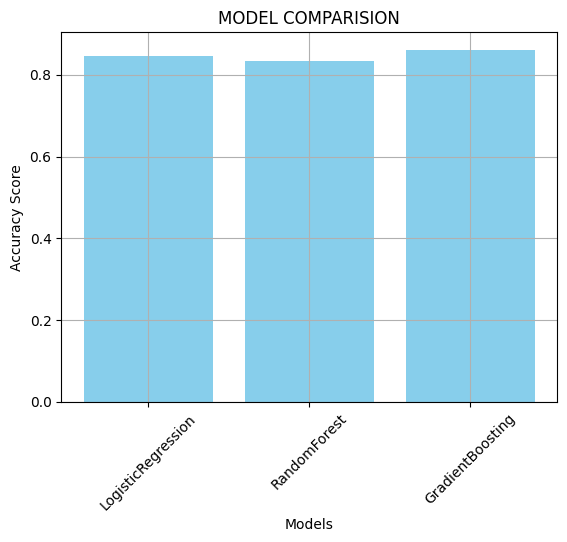

In [50]:
#Visualization
plt.bar(results.keys(), results.values(), color = 'skyblue')
plt.title("MODEL COMPARISION")
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.savefig("model_comparision.png")
plt.show()

In [48]:
%%writefile ESP.py

import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("best_model_pipeline.pkl")

# Mapping dictionaries
education_mapping = {
    "Doctorate": "Doctorate",
    "Professional School": "Prof-school",
    "Master's Degree": "Masters",
    "Bachelor's Degree": "Bachelors",
    "Associate (Vocational)": "Assoc-voc",
    "Associate (Academic)": "Assoc-acdm",
    "Some College": "Some-college",
    "High School Graduate": "HS-grad",
    "12th Grade": "12th",
    "11th Grade": "11th",
    "10th Grade": "10th",
    "9th Grade": "9th",
    "7th–8th Grade": "7th-8th",
    "5th–6th Grade": "5th-6th"
}

workclass_mapping = {
    "Private": "Private",
    "Self Employed (Not Incorporated)": "Self-emp-not-inc",
    "Self Employed (Incorporated)": "Self-emp-inc",
    "Federal Government": "Federal-gov",
    "Local Government": "Local-gov",
    "State Government": "State-gov",
    "Without Pay": "Without-pay",
    "Never Worked": "Never-worked"
}

occupation_mapping = {
    "Professional Specialty": "Prof-specialty",
    "Craft Repair": "Craft-repair",
    "Executive Managerial": "Exec-managerial",
    "Administrative Clerical": "Adm-clerical",
    "Sales": "Sales",
    "Other Service": "Other-service",
    "Machine Operator / Inspector": "Machine-op-inspct",
    "Other/Unknown": "others",
    "Transport Moving": "Transport-moving",
    "Handlers Cleaners": "Handlers-cleaners",
    "Farming Fishing": "Farming-fishing",
    "Technical Support": "Tech-support",
    "Protective Service": "Protective-serv",
    "Private Household Service": "Priv-house-serv",
    "Armed Forces": "Armed-Forces"
}

# Streamlit App Config
st.set_page_config(page_title="EMPLOYEE SALARY PREDICTION", layout="centered")
st.title("EMPLOYEE SALARY PREDICTION")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.") 

# Sidebar Inputs
st.sidebar.header("Input Employee Details : \n")
age = st.sidebar.slider("Age", 18, 80, 30)

education_full = st.sidebar.selectbox("Education", list(education_mapping.keys()))
occupation_full = st.sidebar.selectbox("Job Role", list(occupation_mapping.keys()))
hours_per_week = st.sidebar.slider("Hours per week", 1, 98, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)
capital_gain = st.sidebar.number_input("Capital Gain", min_value=0, value=0, step=100)
capital_loss = st.sidebar.number_input("Capital Loss", min_value=0, value=0, step=100)

marital_status = st.sidebar.selectbox("Marital Status", [
    "Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed",
    "Married-spouse-absent", "Married-AF-spouse"
])

workclass_full = st.sidebar.selectbox("Workclass", list(workclass_mapping.keys()))
native_country = st.sidebar.selectbox("Native Country", [
    "United-States", "Mexico", "Philippines", "Germany", "Canada", "India",
    "England", "China", "Puerto-Rico", "Others"
])

# Map full-form inputs to short-form values
education = education_mapping[education_full]
occupation = occupation_mapping[occupation_full]
workclass = workclass_mapping[workclass_full]

# Input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'marital-status': [marital_status],
    'workclass': [workclass],
    'native-country': [native_country]
})

# Display Input
st.write("Input Data:")
st.write(input_df)

# Predict
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"Prediction: {prediction[0]}")


Overwriting ESP.py


In [ ]:
!streamlit run ESP.py